In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import missingno as msno

In [169]:
# 载入数据
Train_data = pd.read_csv('./train.csv')
Test_data = pd.read_csv('./test.csv')

字段	说明
Age	员工年龄
Attrition	员工是否已经离职，Yes表示离职，No表示未离职
BusinessTravel	商务差旅频率，Non-Travel不出差，TravelRarely不经常出差，TravelFrequently经常出差
DailyRate	平均每日工资
Department	员工所在部门，Sales销售部，Research & Development研发部，Human
Resources人力资源部	
DistanceFromHome	公司跟家庭住址的距离，从1到29，1表示最近，29表示最远
Education	员工的教育程度，从1到5，5表示教育程度最高
EducationField	员工所学习的专业领域，Life Sciences表示生命科学，Medical表示医疗，Marketing表示市场营销，Technical Degree表示技术学位，Human Resources表示人力资源，Other表示其他
EmployeeNumber	员工号码
EnvironmentSatisfaction	员工对于工作环境的满意程度，从1到4，1的满意程度最低，4的满意程度最高
Gender	员工性别，Male表示男性，Female表示女性
JobInvolvement	员工工作投入度，从1到4，1为投入度最低，4为投入度最高
JobLevel	职业级别，从1到5，1为最低级别，5为最高级别
JobRole	工作角色：Sales Executive销售主管，Research Scientist科学研究员，Laboratory Technician实验室技术员，Manufacturing Director制造总监，Healthcare Representative医疗代表，Manager经理，Sales Representative销售代表，Research Director研究总监，Human Resources人力资源
JobSatisfaction	工作满意度，从1到4，1代表满意度最低，4代表最高
MaritalStatus	员工婚姻状况，Single单身，Married已婚，Divorced离婚
MonthlyIncome	员工月收入，范围在1009到19999之间
NumCompaniesWorked	员工曾经工作过的公司数
Over18	年龄是否超过18岁
OverTime	是否加班，Yes表示加班，No表示不加班
PercentSalaryHike	工资提高的百分比
PerformanceRating	绩效评估
RelationshipSatisfaction	关系满意度，从1到4，1表示满意度最低，4表示满意度最高
StandardHours	标准工时
StockOptionLevel	股票期权水平
TotalWorkingYears	总工龄
TrainingTimesLastYear	上一年的培训时长，从0到6，0表示没有培训，6表示培训时间最长
WorkLifeBalance	工作与生活平衡程度，从1到4，1表示平衡程度最低，4表示平衡程度最高
YearsAtCompany	在目前公司工作年数
YearsInCurrentRole	在目前工作职责的工作年数
YearsSinceLastPromotion	距离上次升职时长
YearsWithCurrManager	跟目前的管理者共事年数

In [170]:
Train_data.head().append(Test_data.tail())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,uesr_id,user_id
0,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,1938,...,1,29,2,2,1,0,0,0,1374.0,NaN
1,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,1546,...,1,8,3,3,5,4,0,3,1092.0,NaN
2,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,1066,...,1,8,3,2,7,7,7,5,768.0,NaN
3,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,789,...,0,10,1,3,10,7,0,9,569.0,NaN
4,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,1273,...,0,1,4,3,1,0,1,0,911.0,NaN
289,36,NaN,Travel_Rarely,557,Sales,3,3,Medical,1,2024,...,2,10,2,3,9,7,3,4,NaN,1439.0
290,34,NaN,Travel_Rarely,254,Research & Development,1,2,Life Sciences,1,649,...,1,6,3,3,6,5,1,3,NaN,481.0
291,31,NaN,Travel_Rarely,249,Sales,6,4,Life Sciences,1,163,...,0,12,3,2,7,7,7,7,NaN,124.0
292,38,NaN,Travel_Rarely,1261,Research & Development,2,4,Life Sciences,1,271,...,0,14,3,3,1,0,0,0,NaN,198.0
293,40,NaN,Travel_Rarely,369,Research & Development,8,2,Life Sciences,1,1724,...,1,18,3,3,1,0,0,0,NaN,1229.0


In [171]:
Train_data.shape

(1176, 36)

In [172]:
Train_data.describe()

,uesr_id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.000000
mean,736.124150,36.805272,802.033163,9.159864,2.918367,1.0,1026.960034,2.750850,65.130102,2.724490,...,2.714286,80.0,0.805272,11.161565,2.767007,2.764456,6.982143,4.19898,2.160714,4.098639
std,419.336964,9.065549,405.946729,8.137224,1.009809,0.0,594.763609,1.096221,20.294326,0.715027,...,1.080583,0.0,0.865611,7.747576,1.250756,0.713251,6.094338,3.63124,3.208052,3.564190
min,0.000000,18.000000,104.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,374.750000,30.000000,463.500000,2.000000,2.000000,1.0,498.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,742.500000,36.000000,805.500000,7.000000,3.000000,1.0,1031.000000,3.000000,65.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1101.250000,42.250000,1162.000000,14.000000,4.000000,1.0,1555.250000,4.000000,82.250000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.00000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [173]:
Test_data.describe()

,user_id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.0,294.000000,294.000000,294.000000,294.000000,...,294.000000,294.0,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,728.003401,37.397959,804.295918,9.323129,2.891156,1.0,1016.486395,2.605442,68.935374,2.751701,...,2.704082,80.0,0.748299,11.751701,2.928571,2.748299,7.112245,4.350340,2.295918,4.221088
std,445.219266,9.410335,394.282089,7.996651,1.081203,0.0,631.212630,1.074418,20.218581,0.698302,...,1.085516,0.0,0.795410,7.907933,1.428023,0.679726,6.263088,3.594134,3.282623,3.588296
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,327.000000,31.000000,492.750000,2.000000,2.000000,1.0,445.000000,2.000000,52.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,692.500000,36.000000,773.500000,7.000000,3.000000,1.0,966.500000,3.000000,70.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.250000,43.000000,1129.250000,14.000000,4.000000,1.0,1556.250000,3.000000,87.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.750000,7.000000,3.000000,7.000000
max,1462.000000,60.000000,1496.000000,29.000000,5.000000,1.0,2056.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,37.000000,6.000000,4.000000,36.000000,17.000000,15.000000,17.000000


In [174]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 36 columns):
uesr_id                     1176 non-null int64
Age                         1176 non-null int64
Attrition                   1176 non-null object
BusinessTravel              1176 non-null object
DailyRate                   1176 non-null int64
Department                  1176 non-null object
DistanceFromHome            1176 non-null int64
Education                   1176 non-null int64
EducationField              1176 non-null object
EmployeeCount               1176 non-null int64
EmployeeNumber              1176 non-null int64
EnvironmentSatisfaction     1176 non-null int64
Gender                      1176 non-null object
HourlyRate                  1176 non-null int64
JobInvolvement              1176 non-null int64
JobLevel                    1176 non-null int64
JobRole                     1176 non-null object
JobSatisfaction             1176 non-null int64
MaritalStatus          

In [175]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 35 columns):
user_id                     294 non-null int64
Age                         294 non-null int64
BusinessTravel              294 non-null object
DailyRate                   294 non-null int64
Department                  294 non-null object
DistanceFromHome            294 non-null int64
Education                   294 non-null int64
EducationField              294 non-null object
EmployeeCount               294 non-null int64
EmployeeNumber              294 non-null int64
EnvironmentSatisfaction     294 non-null int64
Gender                      294 non-null object
HourlyRate                  294 non-null int64
JobInvolvement              294 non-null int64
JobLevel                    294 non-null int64
JobRole                     294 non-null object
JobSatisfaction             294 non-null int64
MaritalStatus               294 non-null object
MonthlyIncome               294 non-null in

In [176]:
# 判断数据缺失和异常
Train_data.isnull().sum()

uesr_id                     0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [177]:
Test_data.isnull().sum()

user_id                     0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [178]:
# 训练集和测试集放在一起，方便构造特征
Train_data['train']=1
Test_data['train']=0
data = pd.concat([Train_data, Test_data], ignore_index=True)

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
Age                         1470 non-null int64
Attrition                   1176 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [180]:
from sklearn.preprocessing import LabelEncoder
cat_fea = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 
           'MaritalStatus', 'Over18', 'OverTime']
for feature in cat_fea:
    lbe = LabelEncoder()
    data[feature] = lbe.fit_transform(data[feature])
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'train', 'uesr_id', 'user_id'],
      dtype='object')

In [181]:
data.drop(['EmployeeNumber', 'uesr_id', 'user_id'], axis=1, inplace=True)
data['Attrition'] = data['Attrition'].map(lambda x:1 if x=='Yes' else 0)
data.shape

(1470, 35)

In [182]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'train'],
      dtype='object')

In [183]:
for feature in data.columns:
    print(data[feature].value_counts())

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
0    1282
1     188
Name: Attrition, dtype: int64
2    1043
1     277
0     150
Name: BusinessTravel, dtype: int64
691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64
1    961
2    446
0     63
Name: Department, dtype: int64
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
12     20
17     20
13     19
22 

In [184]:
data.drop(['EducationField', 'Over18', 'StandardHours'], axis=1, inplace=True)
data.shape

(1470, 32)

In [185]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'train'],
      dtype='object')

In [187]:
numeric_fea = ['MonthlyRate', 'MonthlyIncome', 'HourlyRate', 'DailyRate']
cat_fea = ['Age', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

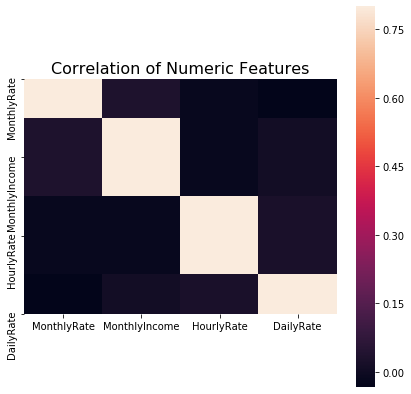

In [190]:
# 数字特征分析
correlation = data[numeric_fea].corr()
f, ax = plt.subplots(figsize = (7,7))
plt.title('Correlation of Numeric Features', y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8)

In [192]:
train_data = data[data['train'] == 1].drop('train', axis=1)
test_data = data[data['train'] == 0].drop('train', axis=1)

In [193]:
train_data.to_csv('./train_data.csv')
test_data.to_csv('./test_data.csv')